<a href="https://colab.research.google.com/github/FastcodeSoftware/Fastcode-Hack-And-Learn/blob/main/code/Fastcode_EasyImageClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries

from fastai.vision.all import *

In [2]:
# Load data from source

path = untar_data(URLs.PETS)

In [3]:
# Explore the dataset

# Note: "annotations" are not used in this classification problem

path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
# Check the number of files

files = get_image_files(path/"images")
len(files)

7390

In [5]:
print(files)

[Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_109.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_124.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_171.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_173.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_50.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_112.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_34.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_39.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_158.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_2.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_145.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_157.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_52.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/image

In [6]:
# Filenames start with a capital letter for cats and lowercase for dogs

files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_109.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_34.jpg'))

In [7]:
# Define a labeling function for the data loader

def label_func(f): return f[0].isupper()

In [8]:
# Create DataLoaders using filenames and a labeling function, resizing each image to 224x224

dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

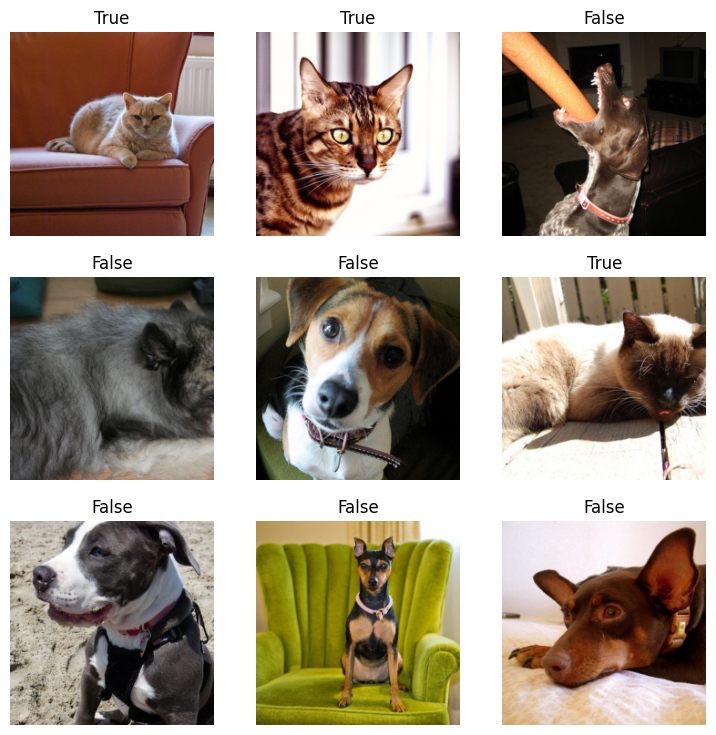

In [9]:
# Display a batch of images

dls.show_batch()

In [10]:
# Create a vision learner using the ResNet34 architecture and track accuracy as the evaluation metric

learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 163MB/s]


In [11]:
# Fine-tune the pre-trained model for 1 epoch on the current dataset

learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.165641,0.028293,0.993234,00:43


epoch,train_loss,valid_loss,accuracy,time
0,0.053128,0.021717,0.993911,00:43


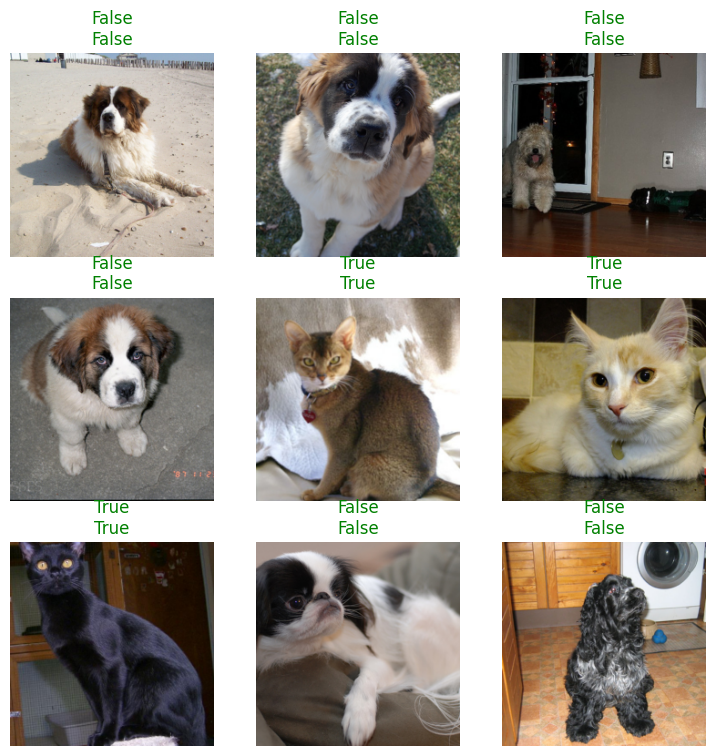

In [13]:
learn.show_results()

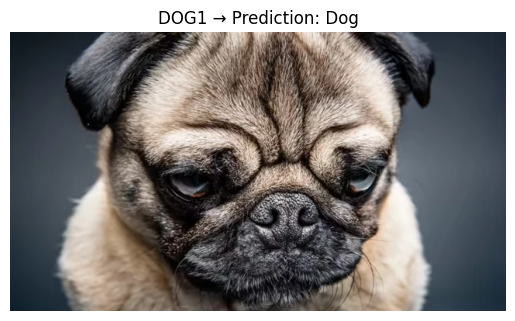

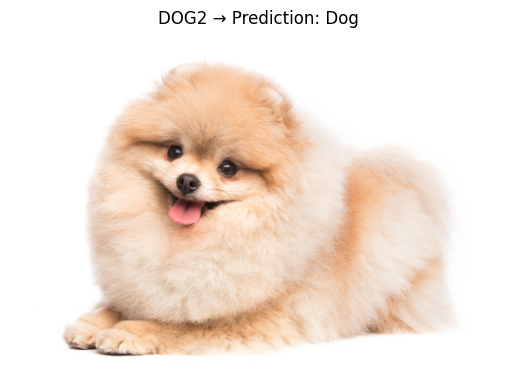

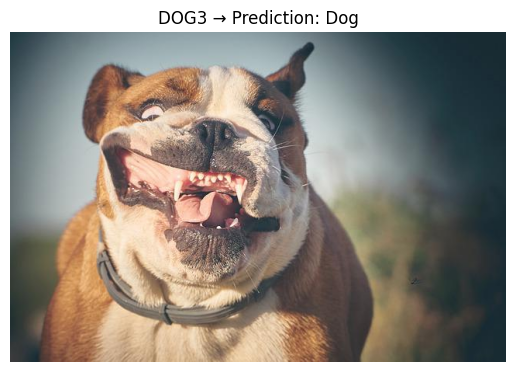

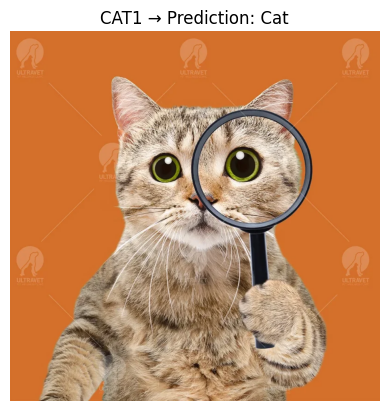

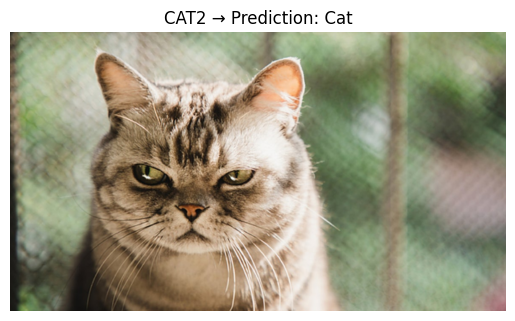

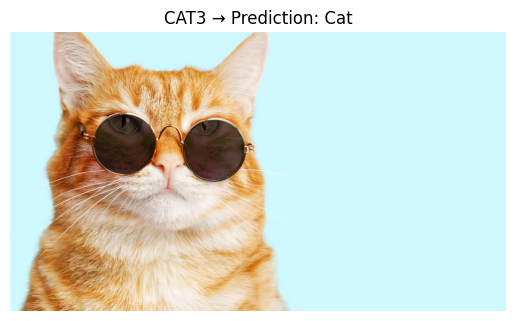

In [17]:
# Validate the model using an image from an external (unseen) source

import os
from PIL import Image
import matplotlib.pyplot as plt

# Define image URLs
images = {
    "dog1": "https://ichef.bbci.co.uk/ace/ws/640/cpsprodpb/cbc1/live/74fe8e20-5170-11ed-ac87-630245663c6a.png.webp",
    "dog2": "https://inwfile.com/s-cp/2k29mw.jpg",
    "dog3": "https://www.thaipedigree.com/static/articles/e660dbabd7493aff4c39f40838fcb642ac51380e291c07c667797d76e33655f8.jpeg",
    "cat1": "https://ultravet-pet.com/wp-content/uploads/2023/07/cat-breed-01-800x800.webp",
    "cat2": "https://c.files.bbci.co.uk/1124F/production/_119932207_indifferentcatgettyimages.png",
    "cat3": "https://static.thairath.co.th/media/dFQROr7oWzulq5Fa5nRRVgnzYSSwUoPM7rigVHaj4QhdURLfyt90hBPNzf89n8vZ5bp.jpg"
}

# Create prediction function
def predict(image_path):
    pred_class, pred_idx, outputs = learn.predict(image_path)
    return 'Cat' if str(pred_class) == 'True' else 'Dog'

# Download, predict, and show images
for name, url in images.items():
    filename = f"{name}.webp" if url.endswith(".webp") else f"{name}.jpg"

    # Download image quietly
    os.system(f"wget -q {url} -O {filename}")

    # Predict
    label = predict(filename)

    # Display image with label
    img = Image.open(filename)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{name.upper()} → Prediction: {label}")
    plt.show()